In [2]:
### Obtain the libraries;

import pandas as pd
import numpy as np
import scipy as sp
import os
from xgboost import XGBClassifier
import xgboost as xgb
import operator
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot



In [3]:
os.getcwd()

Aquifer_Luco = pd.read_csv("Aquifer_Luco.csv", sep = ',')
Aquifer_Luco = Aquifer_Luco.iloc[:, 0:]
Aquifer_Luco.head()


,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [4]:
print(list(Aquifer_Luco))

['Date', 'Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento', 'Rainfall_Mensano', 'Rainfall_Montalcinello', 'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille', 'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina', 'Rainfall_Monteroni_Arbia_Biena', 'Depth_to_Groundwater_Podere_Casetta', 'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Temperature_Siena_Poggio_al_Vento', 'Temperature_Mensano', 'Temperature_Pentolina', 'Temperature_Monteroni_Arbia_Biena', 'Volume_Pozzo_1', 'Volume_Pozzo_3', 'Volume_Pozzo_4']


In [19]:
### Obtain from the first non-missing data point

depth_p_c = Aquifer_Luco[Aquifer_Luco.Depth_to_Groundwater_Podere_Casetta.first_valid_index()

depth_p_c



/Users/chenxili/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Date                                   01/01/2000
Rainfall_Simignano                            NaN
Rainfall_Siena_Poggio_al_Vento                NaN
Rainfall_Mensano                              NaN
Rainfall_Montalcinello                        NaN
Rainfall_Monticiano_la_Pineta                 NaN
Rainfall_Sovicille                            NaN
Rainfall_Ponte_Orgia                          NaN
Rainfall_Scorgiano                            NaN
Rainfall_Pentolina                            NaN
Rainfall_Monteroni_Arbia_Biena                NaN
Depth_to_Groundwater_Podere_Casetta      -7.07923
Depth_to_Groundwater_Pozzo_1                  NaN
Depth_to_Groundwater_Pozzo_3                  NaN
Depth_to_Groundwater_Pozzo_4                  NaN
Temperature_Siena_Poggio_al_Vento               0
Temperature_Mensano                             0
Temperature_Pentolina                         5.5
Temperature_Monteroni_Arbia_Biena             0.8
Volume_Pozzo_1                                NaN


In [20]:
# Part 1: Start with simple time series forecast;
### Mean Imputation;
Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta'].fillna((Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta'].mean()), inplace=True)


In [21]:
Aquifer_Luco[['Depth_to_Groundwater_Podere_Casetta']]

,Depth_to_Groundwater_Podere_Casetta
0,-7.079229
1,-7.079229
2,-7.079229
3,-7.079229
4,-7.079229
...,...
7482,-7.079229
7483,-7.079229
7484,-7.079229
7485,-7.079229


In [22]:
register_matplotlib_converters()

In [23]:
## Check the sample size;
len(Aquifer_Luco)

7487

In [24]:
# Aquifer_Luco['YearMonth'] = Aquifer_Luco['Date'] + pd.offsets.MonthEnd(-1) + pd.offsets.Day(1)

# Aquifer_Luco['YearMonth'] = Aquifer_Luco['Date'] - pd.to_timedelta(Aquifer_Luco['Date'].dt.day-1, unit='D')

Aquifer_Luco['YearMonth'] = pd.to_datetime(Aquifer_Luco['Date']).apply(lambda x: '{year}{month}'.format(year=x.year, month=x.month))


In [25]:
Aquifer_Luco[['YearMonth']]

,YearMonth
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
7482,20206
7483,20206
7484,20206
7485,20206


In [26]:
Aquifer_Luco['Year_Month'] = pd.to_datetime(Aquifer_Luco['YearMonth'], format='%Y%m')

In [27]:
pd_0 = Aquifer_Luco.groupby('Year_Month', sort=True)["Depth_to_Groundwater_Podere_Casetta"].sum().reset_index(name ='Monthly Depth')

In [28]:
pd_0.head()

,Year_Month,Monthly Depth
0,2000-01-01,-219.456097
1,2000-02-01,-205.297639
2,2000-03-01,-219.456097
3,2000-04-01,-212.376868
4,2000-05-01,-219.456097


SyntaxError: invalid syntax (<ipython-input-29-9c8f78ce8222>, line 1)

In [30]:
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [31]:
y = pd_0['Monthly Depth']

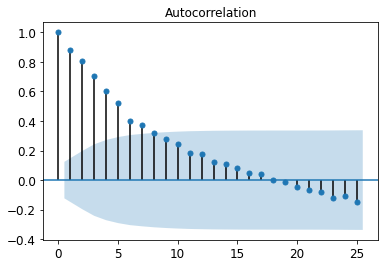

In [32]:
### Draw adf plot

plot_acf(y)
pyplot.show()

### This indicates q = 8; 

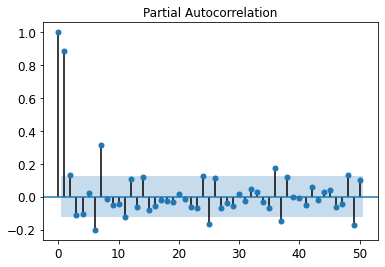

In [33]:
### Draw partial acf plot

plot_pacf(y, lags=50)
pyplot.show()

## This indicates p = 7

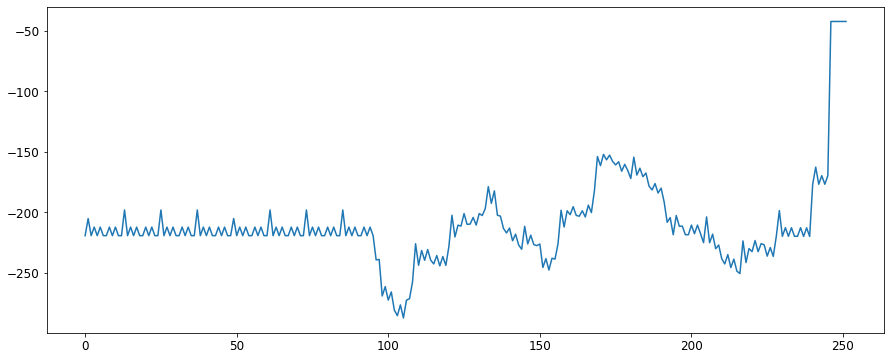

In [34]:
y.plot(figsize=(15, 6))
plt.show()

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

import statsmodels.api as sm

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(7, 1, 8),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5705      0.269     -2.119      0.034      -1.098      -0.043
ar.L2         -0.6144      0.205     -2.996      0.003      -1.016      -0.212
ar.L3          0.2619      0.236      1.108      0.268      -0.201       0.725
ar.L4         -0.0031      0.270     -0.012      0.991      -0.533       0.527
ar.L5         -0.1729      0.252     -0.687      0.492      -0.666       0.320
ar.L6          0.0734      0.209      0.350      0.726      -0.337       0.484
ar.L7         -0.3291      0.227     -1.451      0.147      -0.774       0.116
ma.L1          0.6177      0.396      1.558      0.119      -0.159       1.395
ma.L2          0.7672      0.664      1.156      0.248      -0.534       2.068
ma.L3         -0.1666      0.458     -0.364      0.716      -1.065       0.731
ma.L4          0.0798      0.425      0.188      0.8

/Users/chenxili/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


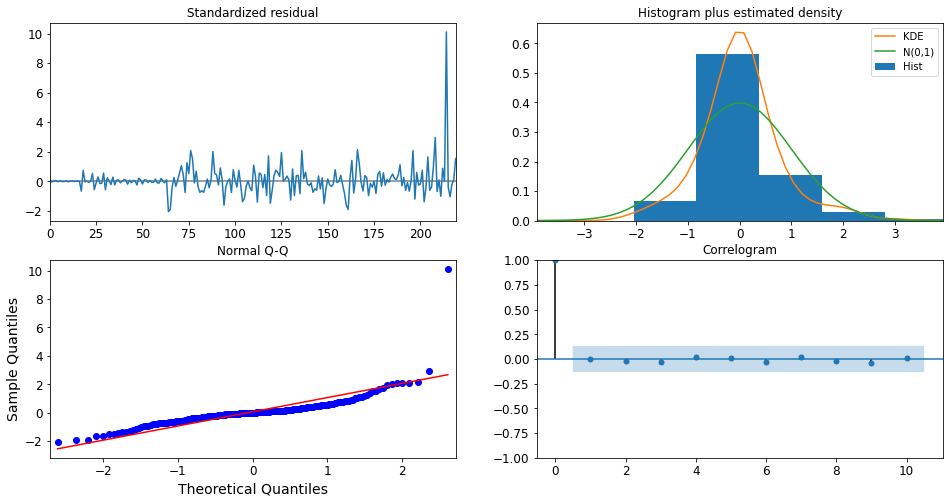

In [42]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [43]:
pred = results.get_prediction(ds=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()


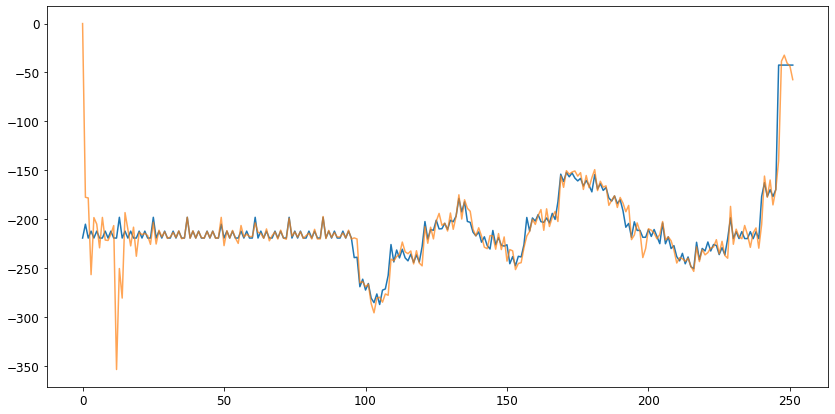

In [44]:
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


In [45]:
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


In [46]:
pd_0.head()

,Year_Month,Monthly Depth
0,2000-01-01,-219.456097
1,2000-02-01,-205.297639
2,2000-03-01,-219.456097
3,2000-04-01,-212.376868
4,2000-05-01,-219.456097


In [48]:
y_forecasted = pred.predicted_mean
# y_truth = y['2016-01-01':]

pd_0_truth = pd_0.loc[pd_0['Year_Month'] >= '2016-01-01']

# y_truth = pd_0['2016-01-01 00:00:00':]
# date_mask = (pd_0.ds >= '2016-01-01 00:00:00')


# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [22]:
### Check ACF BEFORE FITTING THE MODEL;

### Same as residuals

### Vector (Multivariate) Time Series ARIMA 


In [51]:
y_truth = pd_0_truth['Monthly Depth']

In [52]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 236.45


In [53]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15.38


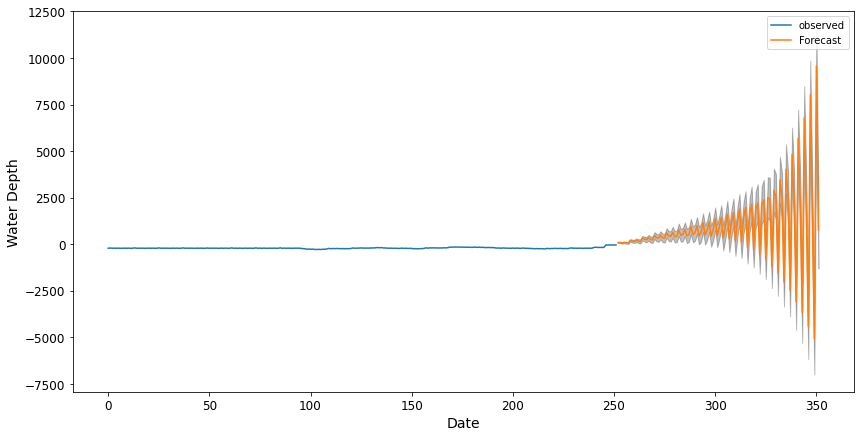

In [54]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Water Depth')
plt.legend()
plt.show()